**Part I: Create a (Free) TigerGraph Solution**
* Firstly, you’ll need to create a free solution at https://tgcloud.io/. It’s a cloud platform where we’ll host our graph database.
* Once you have logged in, navigate to the “My Solutions” tab in the left sidebar then press the blue “Create Solution” button on the top right.
* To get started you will need a TigerGraph cloud instance so select the blank one
* Simply keep the default setting. As for the Solution Settings, you can change Solution name as well as initial password.
* Once you have the box provisioned with the Starter Kit mentioned open GraphStudio from solution operations.
* Create a new graph and navigate to that tab.
* Design a schema and map data to it.
* Navigate to the tab called Load Data. You will see a schema with along with some data files pointing to the vertex and edges. Click the "play button" to start the load process.
* Once you finish loading the data, your graph will be up.


**Part II : Setup Your Notebook**
* We will need the pyTigerGraph packages installed on your Google Colab. pyTigerGraph is the connector we will be using to interface with TigerGraph.
* Setup Server Connection to Notebook: When you provisioned your box you gave it a Unique URL. Please insert that URL into the host parameter. The other parameter you will need to modify is the password. In general, the default password is tigergraph Replace the password with that password you inputed during the provision process. Run the cell. We will print the token to verify the connection is working.
* Implement gsql query which will load graph data into pandas dataframe.
* Using Pandas, we can transform that data into a dataframe. After transforming data, we get the data ready for a basic ML model with Keras framework.

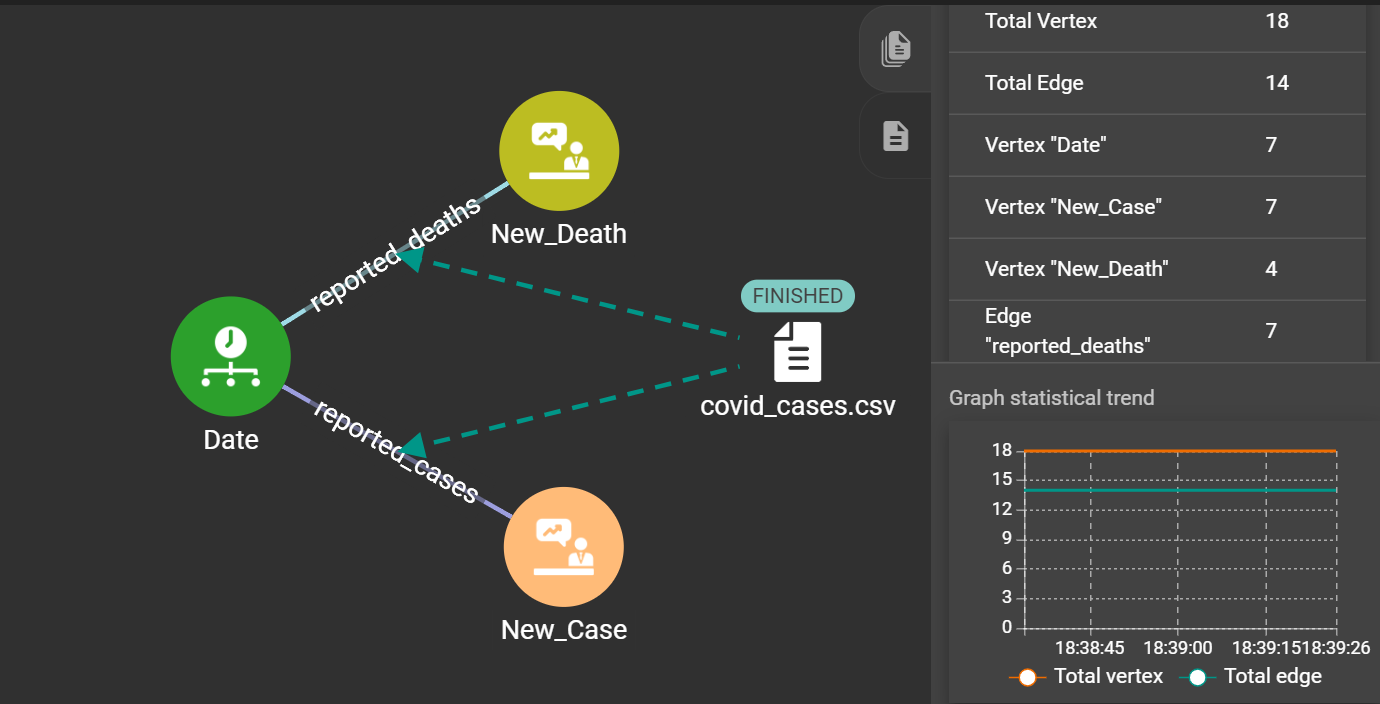

Fig: Graph Schema

In [1]:
#Install pyTigerGraph package in the google colab
!pip install -U pyTigerGraph
#Import and implement these packages that we install previously
import pyTigerGraph as tg
import pandas as pd

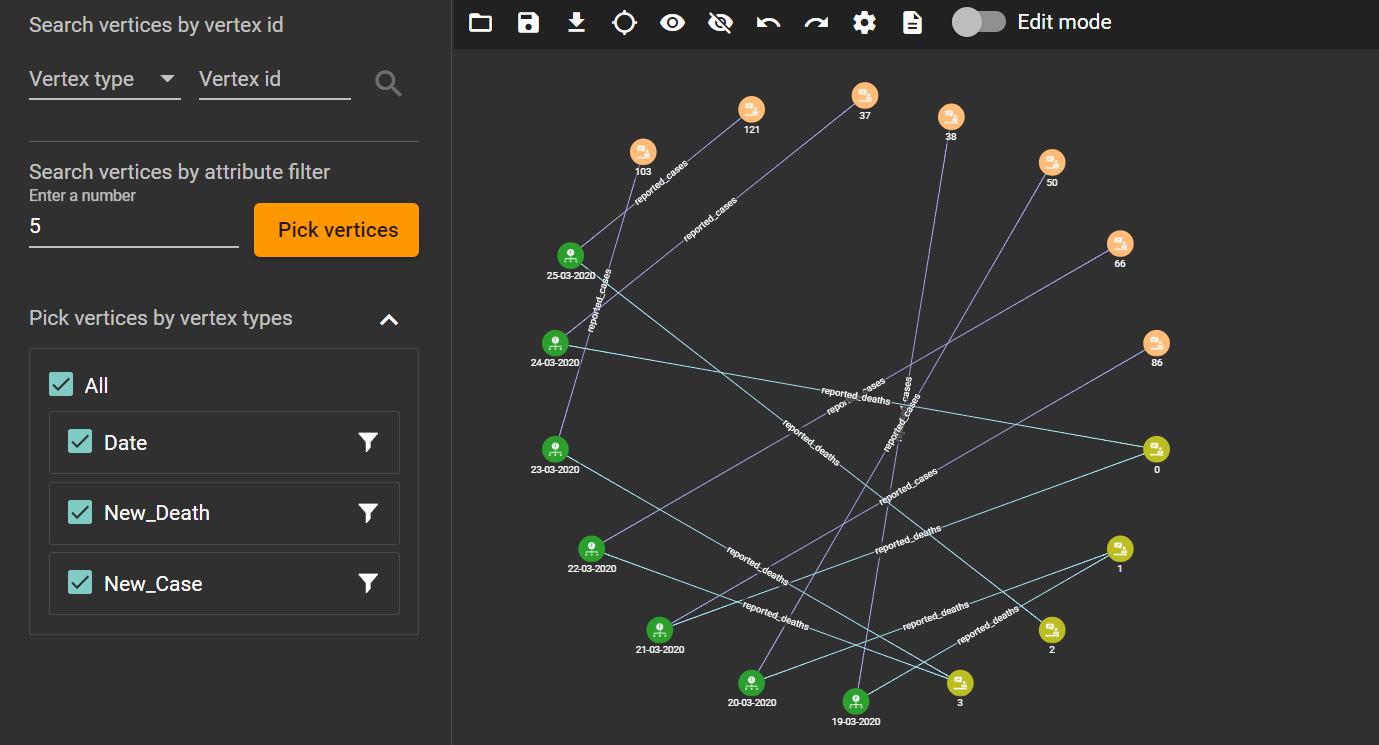

In [2]:
conn = tg.TigerGraphConnection(host="<link>", graphname="<graph name>", username="<username>", password="<passowrd>", useCert=True)
secret = conn.createSecret()
#Let’s check out for the token
token = conn.getToken(secret, setToken=True)
#print(token)

In [3]:
#Returns the verticies of a given vertex type that conform to the various arguments.
df = conn.getVertexDataframe("Date")
df.head()

,v_id,date
0,25-03-2020,1970-01-01 00:00:00
1,24-03-2020,1970-01-01 00:00:00
2,23-03-2020,1970-01-01 00:00:00
3,22-03-2020,1970-01-01 00:00:00
4,20-03-2020,1970-01-01 00:00:00


In [4]:
#Retrieves edges of the given edge type originating from the list of source verticies.
df1 = conn.getEdgesDataframe("Date",sourceVertexId='22-03-2020')
df1.head()

,from_type,from_id,to_type,to_id
0,Date,22-03-2020,New_Death,3
1,Date,22-03-2020,New_Case,66


In [5]:
conn.gsql('''
USE GRAPH Covid_Wave
CREATE QUERY select_deaths() FOR GRAPH Covid_Wave {  
  SELECT date, deaths INTO Temp
  from Date:date - (reported_deaths:registered_cases) - New_Death:deaths;
  PRINT Temp;
}
INSTALL QUERY select_deaths
''', options=[])
preInstalledResult = conn.runInstalledQuery('select_deaths')
parsR = (preInstalledResult)

In [6]:
for item in parsR[0]['Temp']:
  print(item)

{'date': '21-03-2020', 'deaths': '0'}
{'date': '20-03-2020', 'deaths': '1'}
{'date': '22-03-2020', 'deaths': '3'}
{'date': '23-03-2020', 'deaths': '3'}
{'date': '24-03-2020', 'deaths': '0'}
{'date': '25-03-2020', 'deaths': '2'}
{'date': '19-03-2020', 'deaths': '1'}


In [7]:
df = pd.DataFrame(parsR[0]['Temp'])
df.head()

,date,deaths
0,21-03-2020,0
1,20-03-2020,1
2,22-03-2020,3
3,23-03-2020,3
4,24-03-2020,0


In [8]:
conn.gsql('''
USE GRAPH Covid_Wave
CREATE QUERY select_cases() FOR GRAPH Covid_Wave { 
  SELECT date, cases INTO Temp
  from Date:date - (reported_cases:registered_cases) - New_Case:cases;
  PRINT Temp;
}
INSTALL QUERY select_cases
''', options=[])
preInstalledResult = conn.runInstalledQuery('select_cases')
parsR = (preInstalledResult)

In [9]:
df = pd.DataFrame(parsR[0]['Temp'])
df.head()

,date,cases
0,19-03-2020,38
1,23-03-2020,103
2,21-03-2020,86
3,24-03-2020,37
4,20-03-2020,50
